#### In this section, we will conceptually explain the following special characteristics of time series data that requires its special mathematical treatment:
 -  General trend
 -  Seasonality
 -  Cyclical movements
 -  Unexpected variations
 
Based on this notion, a time series can be expressed as xt = ft + st + ct + et, which is a sum of the trend, seasonal, cyclical, and irregular components in that order at time index 't'. The objective of time series analysis is to decompose a time series into its constituent characteristics and develop mathematical models for each.

###### General Trend:
When a time series exhibits an upward or downward movement in the long run, it is said to have a general trend. A quick way to check the presence of general trend is to plot the time series. However, general trend might not be evident over a short run of the series. Short run effects such as seasonal fluctuations and irregular variations cause the time series to revisit lower or higher values observed in the past and hence can temporarily obfuscate any general trend. 

A general trend is commonly modeled by setting up the time series as a <b>regression against time</b> and other known factors as explanatory variables. The regression or trend line can then be used as a prediction of the long run movement of the time series. Residuals left by the trend line is further analyzed for other interesting properties such as seasonality, cyclical behavior, and irregular variations.

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('../Data Files/Monthly_CO2_Concentrations.xlsx',
                     converters={'Year': np.int32, 'Month': np.int32})

In [3]:
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [4]:
#Create row index of the DataFrame using the Year and Month columns
data.index = data['Year'].astype(str) + '-' + data['Month'].astype(str).map(lambda x: '0'+ x if len(x) == 1 else x)
data.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


In [5]:
data = data.loc[(~pd.isnull(data['CO2']))&\
                (~pd.isnull(data['Year']))&\
                (~pd.isnull(data['Month']))]

In [6]:
data.sort_values(['Year', 'Month'], inplace=True)

In [7]:
data.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text xticklabel objects>)

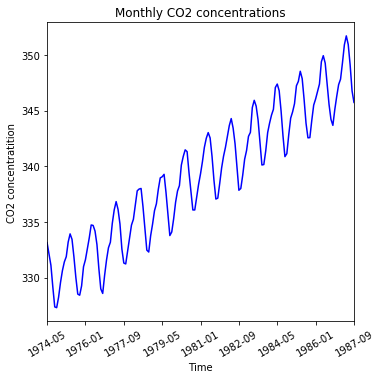

In [8]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

(array([ 0.,  5., 10., 15., 20., 25.]), <a list of 6 Text xticklabel objects>)

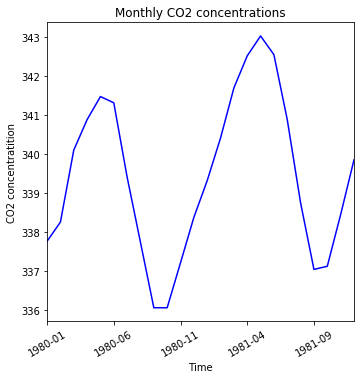

In [9]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['CO2'])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],
                                                           trend_model.intercept_))

Trend model coefficient=0.1209930124223602 and intercept=329.45310559006214


In [13]:
residuals = np.array(data['CO2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text xticklabel objects>)

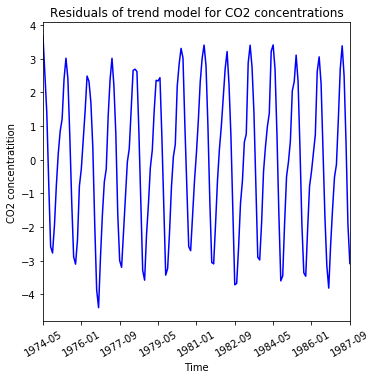

In [14]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

###### Seasonality 
- Manifests as repetitive and period variations in a time series. In most cases, exploratory data analysis reveals the presence of seasonality.

Determining seasonality is through exploratory data analysis through the following plots:

- Run sequence plot: A simple run sequence plot of the original time series with time on x-axis and the variable on y-axis is good for indicating the following properties of the time series: Movements in mean of the series; Shifts in variance; Presence of outliers.


- Seasonal sub series plot: Known periodicity of seasonal variations, seasonal sub series redraws the original series over batches of successive time periods. 


- Multiple box plots:  Displays both central tendency and dispersion within the seasonal data over a batch of time units.

In [15]:
data.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


In [16]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'
                    }
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

In [17]:
data.head()

,CO2,Year,Month,Residuals,Quarter
1974-05,333.13,1974,5,3.676894,Q2
1974-06,332.09,1974,6,2.515901,Q2
1974-07,331.10,1974,7,1.404908,Q3
1974-08,329.14,1974,8,-0.676085,Q3
1974-09,327.36,1974,9,-2.577078,Q3


In [18]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

In [19]:
seasonal_sub_series_data.head()

Quarterly Mean  Quarterly Standard Deviation
Year Quarter                                              
1974 Q2             3.096398                      0.820946
     Q3            -0.616085                      1.991671
     Q4            -1.822397                      1.014952
1975 Q1             0.754624                      0.511890
     Q2             2.604978                      0.355093

In [20]:
#Create row indices of seasonal_sub_series_data using Year & Quarter
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1974-Q2,1974,Q2,3.096398,0.820946
1974-Q3,1974,Q3,-0.616085,1.991671
1974-Q4,1974,Q4,-1.822397,1.014952
1975-Q1,1975,Q1,0.754624,0.511890
1975-Q2,1975,Q2,2.604978,0.355093


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text xticklabel objects>)

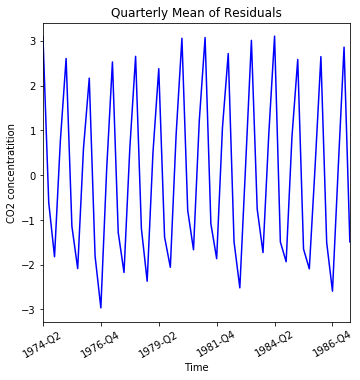

In [21]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text xticklabel objects>)

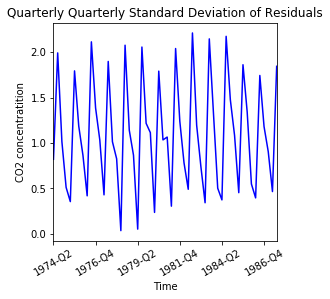

In [22]:
plt.figure(figsize=(4, 4))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

Text(0,0.5,'CO2 concentratition')

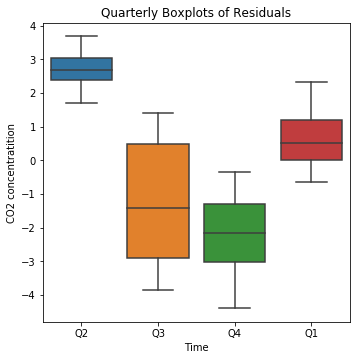

In [23]:
#Multiple box plots to visualize central tendency and dispersion of seasonal sub series
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition')

##### Cyclical changes
- Movements observed after every few units of time, but they occur less frequently than seasonal fluctuations, average periodicity for cyclical changes would be larger than seasonaility. Eg: Business often show cyclical changes that correspond to usual business and macroeconomic cycles such as periods of recessions followed by every of boom, but are separated by few years of time span

- Long run plot of the time series is required to identify cyclical changes

In [24]:
inflation = pd.read_excel('../Data Files/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])

In [25]:
inflation.shape

(57, 3)

In [26]:
inflation.head()

,Year,India,United States
0,1960-01-01,1.783265,1.509929
1,1961-01-01,1.752022,1.075182
2,1962-01-01,3.576159,1.116071
3,1963-01-01,2.941176,1.214128
4,1964-01-01,13.354037,1.308615


Text(0.5,0,'Years')

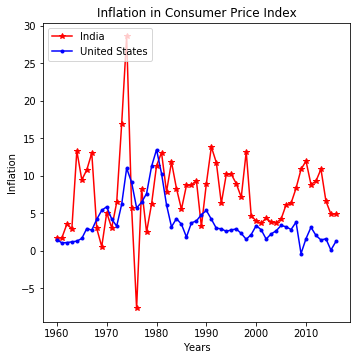

In [27]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='b')
plt.legend(['India','United States'], loc=2)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years')

##### Unexpected variations
Referring to our model that expresses a time series as a sum of four components, it is noteworthy that in spite of being able to account for the three other components, we might still be left with an irreducible error component that is random and does not exhibit systematic dependency on the time index. This fourth component reflects unexpected variations in the time series. Unexpected variations are stochastic and cannot be framed in a mathematical model for a definitive future prediction. This type of error is due to lack of information about explanatory variables that can model these variations or due to presence of a random noise.